Universidad del Valle de Guatemala
##Mineria de Datos
Martin Amado 19020
Laura Tamath 19365
Juan Pablo Pineda 19087

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
import sklearn
# import pyclustertend 
import random

In [26]:
DF = pd.read_csv("movies.csv", encoding="latin1")

# for i in range(len(DF['castMenAmount'])):
#   try:
#     DF = DF.drop(DF[('castMenAmount' > 100) | ('castWomenAmount' > 100)].index)
#   except:
#     DF['castMenAmount'].drop(i)


1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [20]:
xScale = []
for column in DF.columns:
    try:
        column
        DF[column] = (DF[column]-DF[column].mean())/DF[column].std()
        if column == "id" or column == "productionCoAmount" or column == "productionCountriesAmount" or column == "genresAmount":
            continue
        xScale.append(DF[column])
    except:
        continue

In [21]:
normDF = DF.dropna(subset=['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount'], inplace=True)
X = np.array(DF[['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 'actorsAmount']])

Variables que no aportan información:
    id porque es numerica secuencial y no provee información útil.
    original_title, originalLanguage, title, homePage, video, director, genres, productionCompany, productionCompanyCountry, productionCountry, releaseDate, actors, actorsCharacter porque estas variables que expresan una cualidad, característica y/o modalidad. 
    productionCoAmount, productionCountriesAmount, genresAmount porque no son variables que aportan información valiosa, únicamente desmuestran cantidades.

¿Por qué se realizaron estas transformaciones?
  Un factor importante para la hacer la normalización de los datos es reducir el margen de error de los Kmeans, los cuales son muy sensibles a valores atípicos.
  

In [22]:
X_Scale = sklearn.preprocessing.scale(X)
# pyclustertend.hopkins(X, len(X))

## Pregunta 3
Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

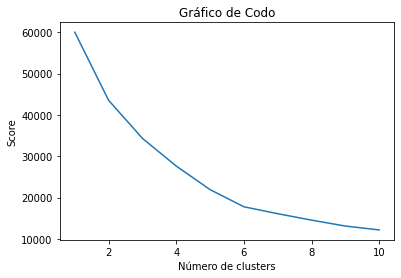

In [23]:
numeroClusters = range(1,11)
wcss = []
for k in numeroClusters:
    try:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X_Scale)
        wcss.append(kmeanModel.inertia_)
    except:
        continue
plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

Luego de obtener el gráfico de codo y analizarlo se determinó que se utilizarán 2 grupos ya que es donde se observa un codo mas pronunciado en el gráfico. Este cambio brusco indica el número óptimo de clusters.

## Pregunta 4
Utilice 3 algoritmos existentes para agrupamiento. Compare los resultados generados por cada uno. 
Referencia: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

Agrupamiento K-means

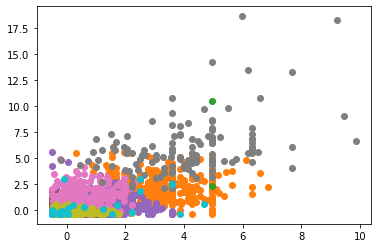

In [7]:
kmeans_result = kmeanModel.predict(X_Scale)
kmeans_clusters = np.unique(kmeans_result)
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # make the plot
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

Agrupamiento BIRCH


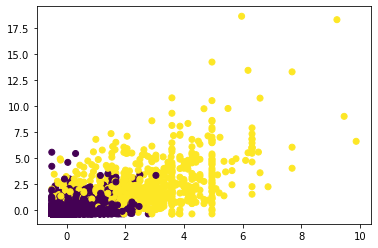

In [14]:
#Definir el modelo
birchModel = Birch(threshold=0.03,  n_clusters=2)
#Entrenar el modelo
birchModel.fit(X_Scale)
#Se obtienen los puntos y los clusters
result = birchModel.predict(X_Scale)
#Graficar los clusters
plt.scatter(X_Scale[:,0], X_Scale[:,1], c = result)
plt.show()

Agrupamiento DBSCAN

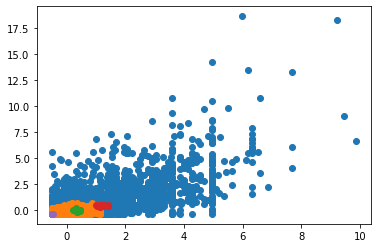

In [9]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(X_Scale)
dbscan_result = dbscan_model.fit_predict(X_Scale)
dbscan_clusters = np.unique(dbscan_result)
for dbscan_cluster in dbscan_clusters:
    index = np.where(dbscan_result == dbscan_cluster)
    plt.scatter(X_Scale[index, 0], X_Scale[index, 1])
plt.show()

## Pregunta 5
Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

El orden de calidad de los algoritmos es el siguiente
  1. BIRCH
  2. K-means
  3. DBSCAN


For n_clusters = 2 The average silhouette_score is: 0.6734984190404748
For n_clusters = 3 The average silhouette_score is: 0.6819956953013584
For n_clusters = 4 The average silhouette_score is: 0.3276965823942554
For n_clusters = 5 The average silhouette_score is: 0.33313920028586014
For n_clusters = 6 The average silhouette_score is: 0.3615052574549073


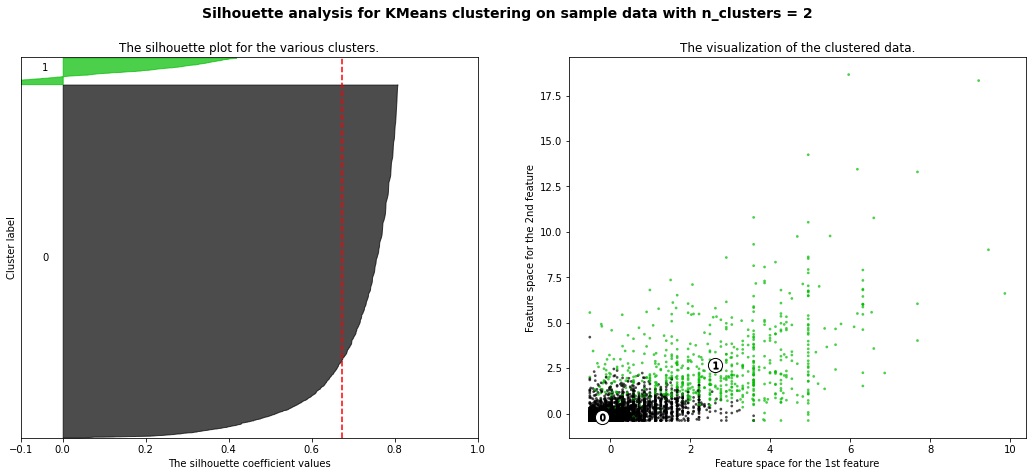

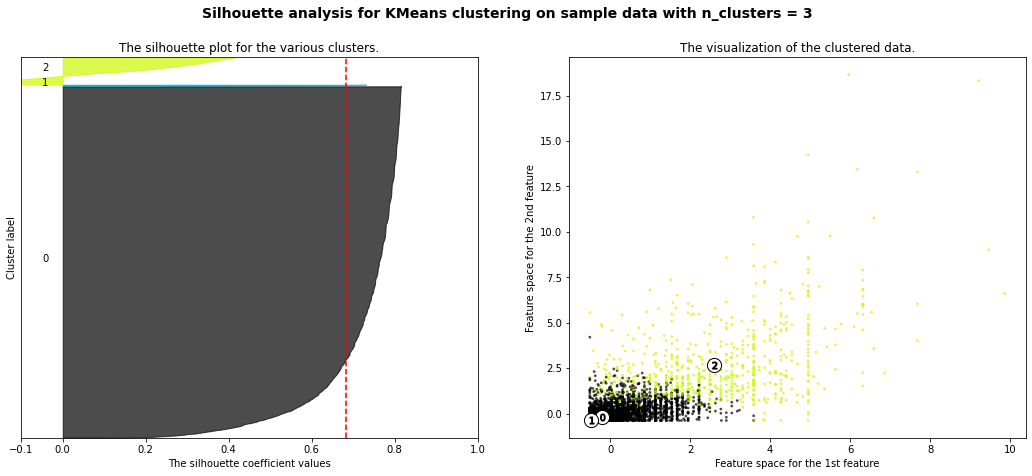

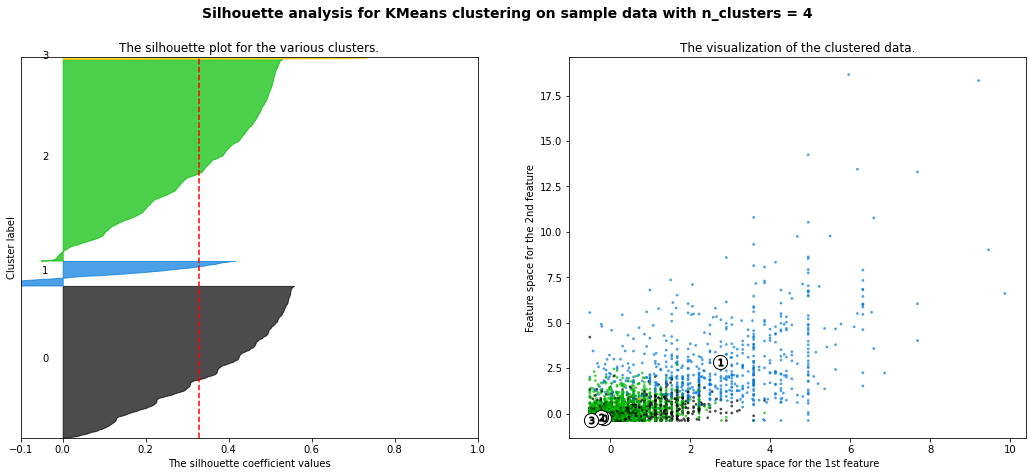

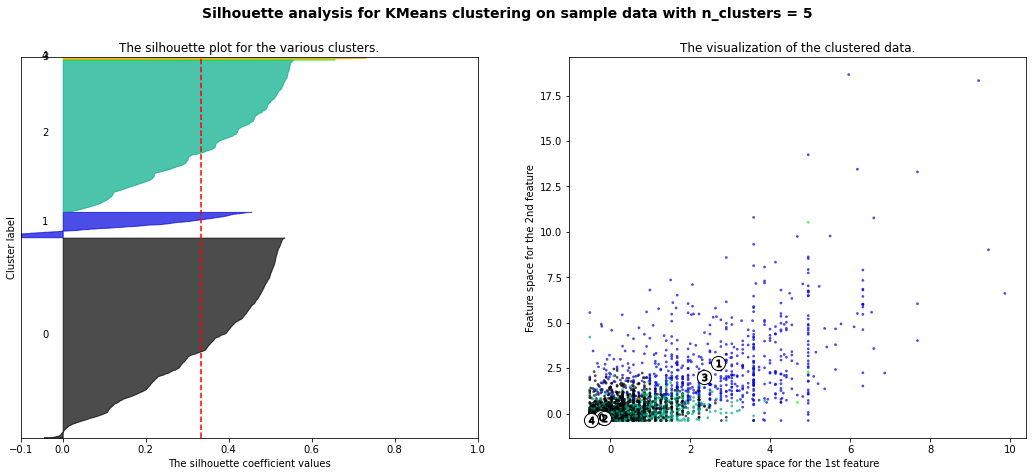

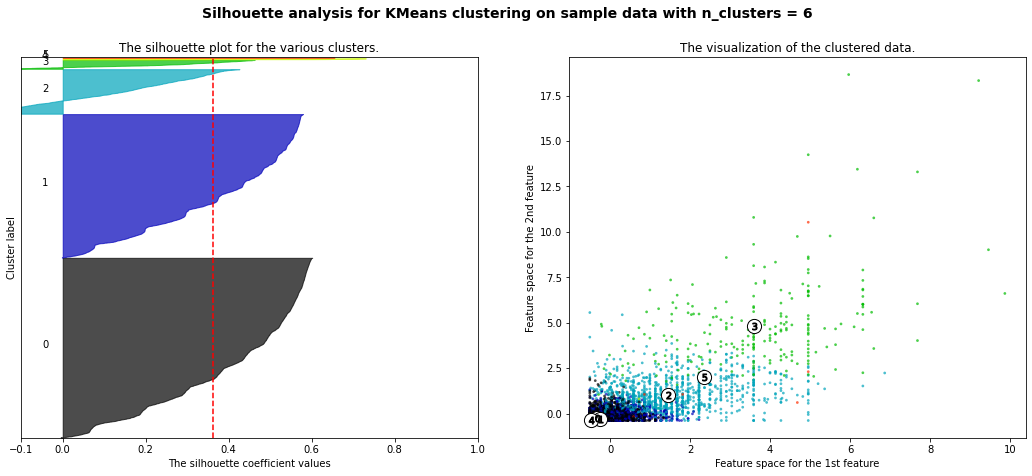

In [17]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)

  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is:",
    silhouette_avg
  )

  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(
      X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
  )

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(
      centers[:, 0],
      centers[:, 1],
      marker="o",
      c="white",
      alpha=1,
      s=200,
      edgecolor="k",
  )

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(
      "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      % n_clusters,
      fontsize=14,
      fontweight="bold",
  )

plt.show()


De acuerdo a los gráficos de silueta observados anteriormente, el mejor número de clusters es 3. El valor de la silueta para 3 clusters es de 0.6819956953013584

Estas siluetas son realizadas con el método de KMeans.
No se pudo realizar esto con Birch, pero se esperaría un mejor reultado de acuerdo a lo establecido previamente.

## Pregunta 6
Interprete  los  grupos  basado  en  el  conocimiento  que  tiene  de  los  datos.  Recuerde  investigar  las medidas de tendencia central de las variables continuas y 
las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

In [32]:
meanData = DF.mean()
medianData = DF.median()
print("Mean:", meanData)
print("\nMedian:", medianData)

Mean: id                           2.498768e+05
budget                       1.855163e+07
revenue                      5.673793e+07
runtime                      1.002681e+02
video                        8.829094e-03
popularity                   5.139391e+01
voteAvg                      6.483490e+00
voteCount                    1.342382e+03
genresAmount                 2.596500e+00
productionCoAmount           3.171400e+00
productionCountriesAmount    1.751000e+00
actorsAmount                 2.147667e+03
dtype: float64

Median: id                           152558.0000
budget                       500000.0000
revenue                      163124.5000
runtime                         100.0000
video                             0.0000
popularity                       21.9055
voteAvg                           6.5000
voteCount                       415.0000
genresAmount                      3.0000
productionCoAmount                3.0000
productionCountriesAmount         1.0000
actorsAmount   

C:\Users\reque\AppData\Local\Temp\ipykernel_18740\2941224057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meanData = DF.mean()
C:\Users\reque\AppData\Local\Temp\ipykernel_18740\2941224057.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianData = DF.median()


Luego de observar los resultados, es importante reiterar que para el clustering, se realizaron dos grupos.
El análisis de BIRCH muestra los mejores resultados gráficamente, y la gráfica de silueta provee un valor de la silueta que apoya esta decisión.

Los dos grupos que se pueden observar son las películas 'blockbuster' de Hollywood, y las películas de bajo presupuesto.

El dato que demuestra esto principalmente es el presupuesto. Y un gran apoyo es las ganancias

Presupuesto
  -Media: 18 millones
  -Mediana: 500 mil
Esto muestra que las películas con mayor presupuesto, las blockbusters, suelen tener mayor presupuesto, lo que aumenta la media, pero la mediana indica que son puntos atípicos.

Ganancias
  -Media: 57 millones
  -Mediana: 163 mil.
Las ganancias muestran una mayor disparidad que el presupuesto. Esto indica que las películas más taquilleras aumentan el valor de la media, pero no representan una mayoría de los datos.